# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах(м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

В данной работе надо выполнить следующие шаги:

Шаг 1. Открыть файл и изучить информацию.

Шаг 2. Предобработка данных:
- определить  пропущенные значения, а также указать причины, которые могли привести к пропускам в данных
- заполнить пропуски, где это уместно
- привести данные к нужным типам

Шаг 3. Добавить в таблицу:
 - цену квадратного метра;
 - день недели, месяц и год публикации объявления;
 - этаж квартиры; варианты — первый, последний, другой;
 - соотношение жилой и общей площади, а также отношение площади кухни к общей.

Шаг 4. Провести исследовательский анализ данных:
 - Построить гистограммы для каждого параметра: площадь, цена, число комнат, высота потолков. 
 - Изучить время продажи квартиры. Постройте гистограмму. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
 - Убрать редкие и выбивающиеся значения. Описать, какие особенности обнаружили.
 - Какие факторы больше всего влияют на стоимость квартиры? Изучить, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучить зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучить зависимость от даты размещения: дня недели, месяца и года.
 - Выбрать 10 населённых пунктов с наибольшим числом объявлений. Посчитать среднюю цену квадратного метра в этих населённых пунктах. Выделить населённые пункты с самой высокой и низкой стоимостью жилья. 
 - Выделить квартиры в Санкт-Петербурге ('locality_name'). Выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. 
 - Выделить сегмент квартир в центре. Изучить следующие параметры: площадь, цена, число комнат, высота потолков. Также выделить факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделать выводы. Отличаются ли они от общих выводов по всему городу?

Шаг 5. Общий вывод

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# apartments = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
apartments = pd.read_csv('real_estate_data.csv', sep = '\t')
apartments.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Таблица состоит из 23699 строк. Самые важные для анализа стоимости недвижимости - цена ('last_price') и общая площадь ('total_area') даны без пропусков. Во многих столбцах есть пропуски данных. Данные  о расстоянии до центра - важный параметр для цены на недвижимость, если квартира находится в поселке, расстояние можно заполнить посмотрев расстояние по карте или из другой строки с таким же названием поселка. Пропуски в количестве балконов, парков и водоемов в районе 3 км говорит о том, что их нет, заменим эти данные на "0". Пропуски в расстоянии до парка, водоема заменим на "3000"        
 Следующие столбцы надо перевести в другой формат: 
+ первый день показа (first_day_exposition) в формат времени; 
+ всего этажей в доме(floors_total), количество балконов (balcony), цена(last_price), расстояние до аэропорта, центра города, парка, водоема (airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest), количество парков и водоемов в радиусе 3 км ( parks_around3000,  ponds_around3000), дни показа (days_exposition) - в тип int; 
+ является ли недвижимость апартаментами (is_apartment) в тип bool

### Шаг 2. Предобработка данных

Проверим наличие пропусков в столбце (высота потолков


In [5]:
apartments['ceiling_height'].isnull().sum()

9195

In [6]:
# посмотрим описание столбца "ceiling_height"
apartments['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Высота потолков в среднем 2,7м, что является средним для квартир в России. Возможно при подаче объявления люди просто не посчитали это важным фактором, если бы в продаваемой квартире высота потолков была 3,3 метра, хозяева не забыли бы это упомянуть. Заменим пропущенные значение высоты потолков на среднее. 

In [7]:
mean_ceiling = apartments['ceiling_height'].mean()
apartments['ceiling_height'] = apartments['ceiling_height'].fillna(mean_ceiling)
apartments[apartments['ceiling_height'].isnull()] #проверим наличие пропущенных значений 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### Пропуски в столбце floors_total (всего этажей в доме)

Всего этажей в доме важный критерий для цены квартиры, первый и последний этаж обычно дешевле. 
Посчитаем количество пустых значений в столбце floors_total по отношению к общему количеству значений в столбце, в процентах.

In [8]:
apartments['floors_total'].isnull().sum() / len(apartments['floors_total']) *100

0.36288450989493226

Строк с пропущенными значениями в столбце с количеством этажей в доме всего 0,3%, можно просто удалить эти строки без ущерба для общего анализа

In [9]:
apartments.dropna(subset=['floors_total'],inplace=True)
apartments['floors_total'].isnull().sum()


0

#### Посчитаем количество пропусков в столбце living_area(жилая площадь)

In [10]:
apartments['living_area'].isnull().sum() / len(apartments['living_area']) *100

7.919366450683945

Количество пропусков 8%, просто удалить их нельзя. Возможно, доля жилой площади к общей в среднем похожи

In [11]:
# доля жилой площади
apartments['rate_living_area'] = apartments['living_area'] / apartments['total_area']
apartments['rate_living_area'].describe()

count    21743.000000
mean         0.564948
std          0.105294
min          0.021583
25%          0.495546
50%          0.568182
75%          0.637956
max          1.000000
Name: rate_living_area, dtype: float64

Стандартное отклонение маленькое - 0.1, то есть данные однородны, заполним пустые значения в "living_area" исходя из среднего "rate_living_area"

In [12]:
# заполним пустые значения средним "rate_living_area"
apartments['rate_living_area'] = (
    apartments['rate_living_area'].fillna(apartments['rate_living_area'].mean())
)

# заполним пустые значения 'living_area' умножив общую площадь квартиры на среднее отношение жилой площади к общей 
apartments['living_area'] = (
    apartments['living_area'].fillna(apartments['rate_living_area'].mean() * apartments['total_area'])
)

apartments['living_area'].isnull().sum()


0

Проделаем аналогичные действия для "kitchen_area"

In [13]:
# количество пропусков в kitchen_area, в %
apartments['kitchen_area'].isnull().sum() / len(apartments['kitchen_area']) *100

9.448185321644857

In [14]:
# отношение площади кухни к общей площади
apartments['rate_kitchen_area'] = apartments['kitchen_area'] / apartments['total_area']
apartments['rate_kitchen_area'].describe()

count    21382.000000
mean         0.187324
std          0.072976
min          0.025381
25%          0.133333
50%          0.172348
75%          0.232428
max          0.787879
Name: rate_kitchen_area, dtype: float64

In [15]:
# заполним пустые значения средним "rate_kitchen_area"
apartments['rate_kitchen_area'] = (
    apartments['rate_kitchen_area'].fillna(apartments['rate_kitchen_area'].mean())
)

# заполним пустые значения 'kitchen' умножив общую площадь квартиры на среднее отношение площади кухни
# к общей 
apartments['kitchen_area'] = (
    apartments['kitchen_area']
    .fillna(apartments['rate_kitchen_area'].mean() * apartments['total_area'])
)

apartments['kitchen_area'].isnull().sum()


0

#### Пустые значения в столбце "апартаменты"

In [16]:
apartments['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Большинство квартир в России относится к жилому фонду, широкое распространение апартаменты получили только в последнее десятилетие. Заполним пропуски на False

In [17]:
apartments['is_apartment'] = apartments['is_apartment'].fillna(False)
apartments['is_apartment'].value_counts()

False    23563
True        50
Name: is_apartment, dtype: int64

#### Пропуски в количестве балконов, парков и водоемов в районе 3 км и прочие 
Пропуски в количестве балконов, парков и водоемов в районе 3 км говорит о том, что их нет, заменим эти данные на "0". Пропуски в расстоянии до парка, водоема заменим на 3.001 км

In [18]:
apartments['balcony'] = apartments['balcony'].fillna(0)
apartments['parks_around3000'] = apartments['parks_around3000'].fillna(0)
apartments['ponds_around3000'] = apartments['ponds_around3000'].fillna(0)
apartments['parks_nearest'] = apartments['parks_nearest'].fillna(3001)
apartments['ponds_nearest'] = apartments['ponds_nearest'].fillna(3001)

Заменим пустые строки в "airports_nearest" на -1, чтобы видеть где данные отсутствовали

In [19]:
apartments['airports_nearest'] = apartments['airports_nearest'].fillna(-1)

Заменим пустые строки в "days_exposition" на -1, чтобы видеть где данные отсутствовали

In [20]:
apartments['days_exposition'] = apartments['days_exposition'].fillna(-1)
# apartments['days_exposition']

##### Расстояние до центра
Растояние до центра важно для анализа, если квартира находится в Санкт-Петербурге. Посмотрим для какого населенного пункта пропущено расстояние до центра. 

In [21]:
(
    apartments[apartments['cityCenters_nearest'].isnull()]['locality_name']
    .value_counts().head(10)  #где пропущено расстояние
)


посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [22]:
#  Посчитаем среднее расстояние до центра для населенных пунктов, которые были заполнены 
# в исходной таблице и заполним пропуски

distance_locality =  apartments.pivot_table(index='locality_name', values='cityCenters_nearest',
                                            aggfunc=['median'])
distance_locality.columns=['median_loc_dist']

for loc_name in distance_locality.index:    
        apartments.loc[apartments['locality_name'] == loc_name,'cityCenters_nearest'] = apartments.loc[apartments['locality_name'] == loc_name,'cityCenters_nearest'].fillna(distance_locality.loc[loc_name, 'median_loc_dist'])

apartments[apartments['cityCenters_nearest'].isnull()]['locality_name'].value_counts().head(10)


посёлок Мурино             520
Всеволожск                 398
Гатчина                    307
деревня Кудрово            299
Выборг                     237
Кудрово                    171
деревня Новое Девяткино    143
Сертолово                  142
Кириши                     125
Сланцы                     112
Name: locality_name, dtype: int64

In [23]:
# Заменим "деревня Кудрино" на "Кудрино
try:    
    apartments.loc[
        apartments['locality_name'] == 'деревня Кудрово','locality_name'] = apartments.loc[
        apartments['locality_name'] == 'Кудрово','locality_name']
    
except:
    ""

 Создадим таблицу с расстоянием до разных населенных пунктов, а затем внесем данные в общую таблицу

In [24]:
# Создадим таблицу с расстоянием до поселков
distance_data = pd.DataFrame({
    'locality': ['посёлок Мурино', 'Всеволожск', 'Гатчина', 'деревня Кудрово', 'Выборг', 'Кудрово',
                 'деревня Новое Девяткино', 'Сертолово', 'Кириши', 'Сланцы', 'Волхов'], 
    'distance': [2000, 22000, 38000, 19000, 132000, 19000,
                 5000, 24000, 170000, 205000, 131000],    
})
distance_data.index = distance_data ['locality']
# distance_data

In [25]:
# внесем данные по расстоянию до поселков в общую таблицу

for inc_name in distance_data.index:
    apartments.loc[
        apartments['locality_name'] == inc_name,'cityCenters_nearest'
    ] = apartments.loc[apartments['locality_name'] == inc_name,'cityCenters_nearest'].fillna(
        distance_data.loc[inc_name,'distance'])
    
# pd.to_numeric(apartments['cityCenters_nearest'],errors='ignore')
# посмотрим топ-10 населенных пунктов где пропущено расстояние до центра
(
    apartments[apartments['cityCenters_nearest'].isnull()]['locality_name']
    .value_counts().head(10)  #где пропущено расстояние
)

Кингисепп         104
Тосно             104
Никольское         93
Коммунар           89
Сосновый Бор       87
Кировск            84
Отрадное           80
посёлок Бугры      68
Приозерск          66
деревня Старая     64
Name: locality_name, dtype: int64

In [26]:
apartments['cityCenters_nearest'].isnull().sum() / apartments['cityCenters_nearest'].count()
# apartments['cityCenters_nearest']

0.15529135476295317

Осталось 15% пропусков в 'cityCenters_nearest', однако населенные пункты, где совералось больше всего сделок мы заполнили.

#### Количество пропусков в названии населенных пунктов

In [27]:
apartments['locality_name'].isnull().sum() / apartments['locality_name'].isnull().count()

0.014695294964638122

Всего 1% пропусков, удалим эти строки

In [28]:
apartments.dropna(subset=['locality_name'],inplace=True)
apartments['locality_name'].isnull().sum()

0

### Вывод

Были обнаружены следующие пропуски:
 - в столбце высота потолков: 
 заменены на среднюю высоту потолков, вероятно потолки в таких объявлениях самые обычные
 - в столбце всего этажей в доме - пропуски составляли 0,3% от всех объявлений, их просто удалили
 - в столбцах жилая площадь и площадь кухни  - заменены исходя из среднего отношения площади жилой/кухни к общей площади квартиры
 - в столбце апартаменты ли продаваемая квартира - заполнены на "False", исходя из предположения, что большинство квартир в России относится к жилому фонду, а не к апартаментам
 - в количестве балконов, парков и водоемов в районе 3 км говорит о том, что их нет, заменим эти данные на "0". Пропуски в расстоянии до парка, водоема заменим на 3.001 км
 - в "days_exposition" заменим пустые строки на -1, чтобы видеть где данные отсутствовали
 - в расстоянии до центра, где это возможно заменены на среднее по каждому населенному пункту. Для нескольких населенных пунктов с большим количеством объявлений данные заполнены из новой таблицы, куда внесены данные с расстоянием до разных населенных пунктов, полученные из интернета
 - в названии населенных пунктов - 1% от общего числа, эти строки просто удалены

### Замена типа данных

Ещё раз посмотрим на типы данных

In [29]:
apartments.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23266 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23266 non-null  int64  
 1   last_price            23266 non-null  float64
 2   total_area            23266 non-null  float64
 3   first_day_exposition  23266 non-null  object 
 4   rooms                 23266 non-null  int64  
 5   ceiling_height        23266 non-null  float64
 6   floors_total          23266 non-null  float64
 7   living_area           23266 non-null  float64
 8   floor                 23266 non-null  int64  
 9   is_apartment          23266 non-null  bool   
 10  studio                23266 non-null  bool   
 11  open_plan             23266 non-null  bool   
 12  kitchen_area          23266 non-null  float64
 13  balcony               23266 non-null  float64
 14  locality_name         23266 non-null  object 
 15  airports_nearest   

Переведем первый день показа (first_day_exposition) в формат времени

In [30]:
apartments['first_day_exposition'] = pd.to_datetime(apartments['first_day_exposition'],
                                                    format='%Y-%m-%dT%H:%M:%S')
apartments['first_day_exposition']

0       2019-03-07
1       2018-12-04
2       2015-08-20
3       2015-07-24
4       2018-06-19
           ...    
23694   2017-03-21
23695   2018-01-15
23696   2018-02-11
23697   2017-03-28
23698   2017-07-21
Name: first_day_exposition, Length: 23266, dtype: datetime64[ns]

Следующие столбцы надо перевести в формат int:
- всего этажей в доме(floors_total), количество балконов (balcony), цена(last_price), расстояние до аэропорта, центра города, парка, водоема (airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest), количество парков и водоемов в радиусе 3 км ( parks_around3000, ponds_around3000), дни показа (days_exposition)


In [31]:
apartments['last_price'] = apartments['last_price'].astype('int')
apartments['floors_total'] = apartments['floors_total'].astype('int')
apartments['balcony'] = apartments['balcony'].astype('int')
apartments['airports_nearest'] = apartments['airports_nearest'].astype('int')

apartments['parks_nearest'] = apartments['parks_nearest'].astype('int')
apartments['ponds_nearest'] = apartments['ponds_nearest'].astype('int')
apartments['parks_around3000'] = apartments['parks_around3000'].astype('int')
apartments['ponds_around3000'] = apartments['ponds_around3000'].astype('int')



In [32]:
pd.to_numeric(apartments['days_exposition'])
apartments['days_exposition'] = apartments['days_exposition'].astype('int')


Переведем столбец is_apartment (является ли недвижимость апартаментами)  в тип bool

In [33]:
apartments['is_apartment'] = apartments['is_apartment'].astype('bool')
apartments['is_apartment'].value_counts()

False    23216
True        50
Name: is_apartment, dtype: int64

### Вывод

Следующие столбцы переведены в другой формат:

- первый день показа (first_day_exposition) в формат времени;
- всего этажей в доме(floors_total), количество балконов (balcony), цена(last_price), расстояние до аэропорта, центра города, парка, водоема (airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest), количество парков и водоемов в радиусе 3 км ( parks_around3000, ponds_around3000), дни показа (days_exposition) - в тип int;
- является ли недвижимость апартаментами (is_apartment) в тип bool

### Шаг 3. Посчитайте и добавьте в таблицу

### Цена квадратного метра
Добавим в таблицу столбец "price_per_meter" с ценой за квадратный метр

In [34]:
apartments['price_per_meter'] = apartments['last_price'] / apartments['total_area']
apartments['price_per_meter']

0        120370.370370
1         82920.792079
2         92785.714286
3        408176.100629
4        100000.000000
             ...      
23694     72490.845228
23695     52542.372881
23696     44091.710758
23697    149511.400651
23698     41795.665635
Name: price_per_meter, Length: 23266, dtype: float64

#### День недели, месяц и год публикации объявления

In [35]:
apartments['weekday'] = apartments['first_day_exposition'].dt.weekday
apartments['month'] = apartments['first_day_exposition'].dt.month
apartments['year'] = apartments['first_day_exposition'].dt.year
apartments['year']

0        2019
1        2018
2        2015
3        2015
4        2018
         ... 
23694    2017
23695    2018
23696    2018
23697    2017
23698    2017
Name: year, Length: 23266, dtype: int64

#### этаж квартиры; варианты — первый, последний, другой

In [36]:
# функция category_floor сравнивает этаж жилья с количеством этажей в доме и присваисает
# значение "первый", "последний" или "другой"
def category_floor(row):
    floor = row['floor']
    total_floor = row['floors_total']
    if floor == total_floor:
        return 'последний'
    if floor == 1:
        return 'первый'
    return 'другой'

# новый столбец "var_floor" где хранятся категории этажей
apartments['var_floor'] = apartments.apply(category_floor, axis=1)
apartments[['var_floor','floor', 'floors_total']].head()
# apartments[['var_floor','floor', 'floors_total']].query('floors_total == floor')

,var_floor,floor,floors_total
0,другой,8,16
1,первый,1,11
2,другой,4,5
3,другой,9,14
4,другой,13,14


#### Cоотношение жилой и общей площади, а также отношение площади кухни к общей
Такие столбцы уже были добавлены ранее: 

In [37]:
apartments[['total_area','rate_living_area', 'rate_kitchen_area']].head()


,total_area,rate_living_area,rate_kitchen_area
0,108.0,0.472222,0.231481
1,40.4,0.460396,0.272277
2,56.0,0.612500,0.148214
3,159.0,0.564948,0.187324
4,100.0,0.320000,0.410000


### Вывод
Посчитано и добавлено в таблицу:
 - цену квадратного метра;
 - день недели, месяц и год публикации объявления;
 - этаж квартиры; варианты — первый, последний, другой;
 - соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

 Построим гистограммы для каждого параметра: площадь, цена, число комнат, высота потолков.

 Построим гистограммы для параметра площадь (total_area)

Text(0.5, 1.0, 'Гистограмма по площади квартир, кв.м.')

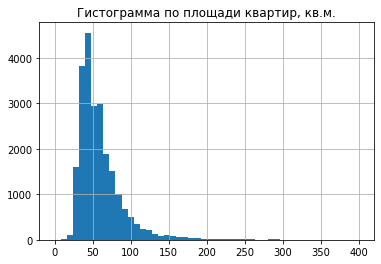

In [38]:

apartments['total_area'].hist(bins=50, range=(0,400), grid=True)
plt.title('Гистограмма по площади квартир, кв.м.')

Больше всего предложений по квартирам, площадью 40-50 кв.м. Однако встречаются и квартиры 200-400 кв.м. 
Если верить сайту Urbanus.ru в топ-10 самых больших квартир бизнес-класса, реализованных в январе-июне 2018 года вошли лоты площадью от 153,09 кв. м до 211,61 кв. м. В категории апартаментов бизнес-класса в топ-10 крупногабаритных лотов вошли объекты площадью от 132,5 кв. м до 269,7 кв.м. То есть за полгода продали всего 20 квартир и апартаментов, площадью больше 150 кв. Все эти объекты уникальны и редки, удалим их из нашей таблицы. Создадим новую таблицу "cut_apartments" на основе "apartments" уже без объектов со слишком большой площадью


In [39]:
cut_apartments = apartments.query('total_area < 150')
cut_apartments.shape


(22687, 29)

 Построим гистограмму для цены и для цены квадратного метра

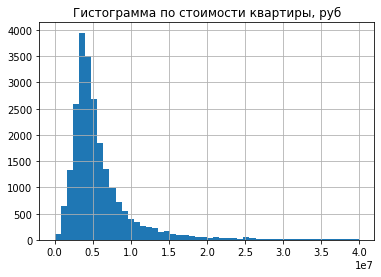

In [66]:
apartments['last_price'].hist(bins=50, range=(0,40000000), grid=True)
plt.title('Гистограмма по стоимости квартиры, руб');

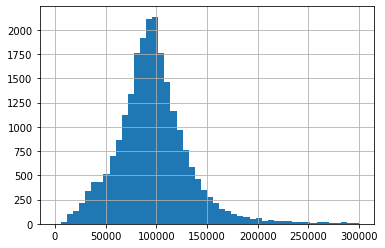

In [41]:
apartments['price_per_meter'].hist(bins=50, range=(0,300000), grid=True)
plt.title('Гистограмма по цене квартиры за квадратный метр');

Средняя цена квартир составляет 5 млн.руб, средняя цена за квадратный метр - 100 тыс.руб/кв.м
\ Уберем слишком дорогие квартиры, построим ящик с усами, чтобы узнать какая цена за квадратный метр за пределами нормального распределения.

(0, 200000)

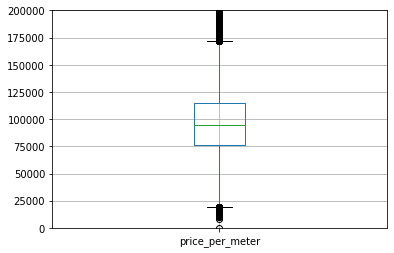

In [42]:
apartments.boxplot('price_per_meter')
plt.ylim(0, 200000)

In [43]:
# выберем квартиры от 20 000 до 175 000 за квадратный метр
cut_apartments = cut_apartments.query(' 20000 < price_per_meter < 175000')

#### Построим гистограмму по количеству комнат

count    23266.000000
mean         2.078784
std          1.079648
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

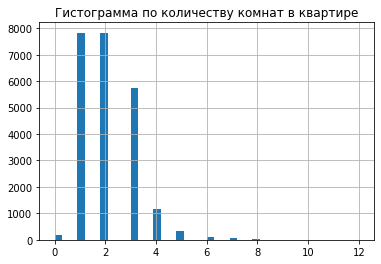

In [67]:
apartments['rooms'].hist(bins=40, range=(0,12), grid=True)
plt.title('Гистограмма по количеству комнат в квартире');
apartments['rooms'].describe()

Чаще всего встречаются объявления о продаже 1-,2-х комнатных квартир, в 75% случаев у квартир не более 3 комнат, даже в самых больших квартирах редко бывает больше 6 комнат. Например, в коммунальных квартирах обычно 3-6 комнат. Смело можем исключить из нашей выборки квартиры с более 6 комнатами. Также присутствуют квартиры с 0 комнат, вероятно это студии или квартиры со свободной планировкой, выберем из таблицы нужные строки и проверим догадку.

In [45]:
apartments.query('rooms==0')[['studio', 'open_plan']].head()

,studio,open_plan
144,True,False
440,True,False
508,False,True
608,True,False
716,True,False


In [46]:
# исключим из нашей выборки квартиры с более 6 комнатами
cut_apartments = cut_apartments.query('rooms <= 6')
cut_apartments.shape

(21851, 29)

#### Построим гистограмму  по высоте потолков

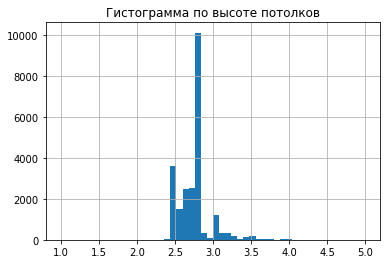

In [68]:
apartments['ceiling_height'].hist(bins=50, range=(1,5), grid=True)
plt.title('Гистограмма по высоте потолков');

В большинстве объявлений высота потолков - 2,7м 
В Японии высота потолка в помещениях в среднем 2,10 метра. 
Минимальная высота потолка в России определяется СНиП как 2,5 м. Высота потолков в "Сталинке" 3.3 м
В элитных домах постройки конца 90-х и "нулевых" годов высота потолков обычно не превышала 3,3 м. Лишь относительно недавно на рынке стали появляться квартиры в новостройках с потолками от 4 до 10 метров.
Оставим в таблице значения с высотой потолков от 2,5 до 4 м

In [48]:
cut_apartments = cut_apartments.query('2.5 <= ceiling_height <= 4')
cut_apartments.shape

(21726, 29)

#### Изучим время продажи квартиры. 
Построим гистограмму. Ранее мы заменили пропущенные значения в столбце на "-1", чтобы не исказить данные, будем считать только случаи, где время продажи больше 0 дней. Посчитаем среднее и медиану.


count    20095.000000
mean       180.739438
std        219.544138
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

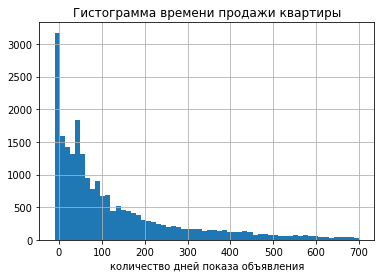

In [72]:
apartments['days_exposition'].hist(bins=60, range=(-10,700), grid=True)
plt.xlabel('количество дней показа объявления')
plt.title('Гистограмма времени продажи квартиры');
apartments.query('days_exposition>=0')['days_exposition'].describe()

Как видно из гистограммы, чаще всего продажа квартиры занимает около 50 дней. Однако, также много квартир продаются от 0 до 50дней. Первый квартиль равен 45 дней. Можно считать, что продажи прошли очень быстро, если удалось продать менее чем за 45дней. Третий квартиль равняется 232 дням, но много случаев, когда квартира продавалась дольше. Если квартира продается дольше 600 дней (полтора года) это необычно долго.


### Зависит ли цена от квадратного метра, числа комнат, удалённости от центра

Построим графики зависимости цены от квадратного метра 

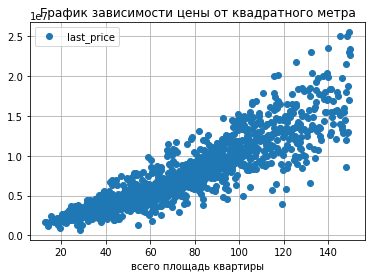

In [74]:
cut_apartments.sort_values('total_area').pivot_table(index = 'total_area', 
                          values= ['last_price']).plot(style='o', grid=True)
plt.xlabel('всего площадь квартиры')
plt.title('График зависимости цены от квадратного метра');

Общая цена квартиры прямо пропорциональна общей площади квартиры. В случае с маленькими квартирами до 60 кв.м. эта зависимость явная, при большей площади квартиры разброс цен больше 

Построим графики зависимости цены от удаленности от центра

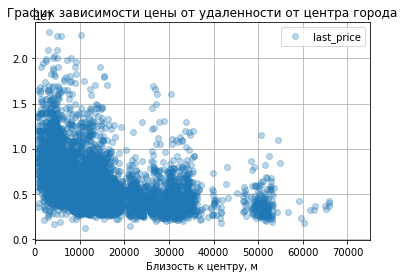

In [75]:

cut_apartments.sort_values('cityCenters_nearest').pivot_table(index = 'cityCenters_nearest', 
                          values= ['last_price']).plot(style='o', grid=True, xlim=(0, 75000), alpha=0.3)
plt.xlabel('Близость к центру, м')
plt.title('График зависимости цены от удаленности от центра города');

Чем ближе к центру, тем больше разброс в ценах, максимальные значения цен также ближе к центру города. По мере удаления от центра объявления смещаются в область меньших цен

Рассчитаем зависимость средней цены за квадратный метр от первого, последнего или другого этажа. 

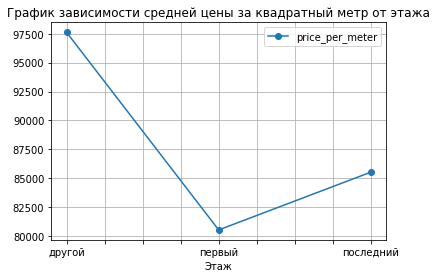

In [77]:

cut_apartments.pivot_table(index = 'var_floor', 
                          values= ['price_per_meter']).plot(style='o-', grid=True)

plt.xlabel('Этаж')
plt.title('График зависимости средней цены за квадратный метр от этажа');

Средняя цена за квадратный метр в случае первого этажа меньше на 17500 за квадратный метр, чем любой не первый и не последний. Последний этаж чуть дороже первого, но тоже ощутимо ниже, чем любой другой.

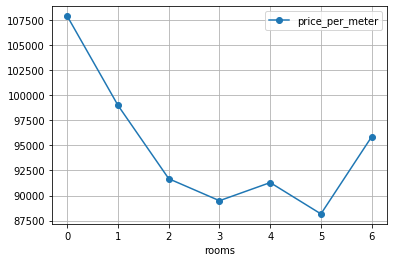

In [53]:

cut_apartments.pivot_table(index = 'rooms', 
                          values= ['price_per_meter']).plot(style='o-', grid=True)
plt.xlabel('Количество комнат')
plt.ylabel('Cредняя цена за квадратный метр')
plt.title('График зависимости средней цены за квадратный метр от количества комнат');

Цена за квадратный метр выше для 0 комнат, это в нашей таблице обозначает апартаменты или квартиры со свободной планировкой, это обычно новые дома, поэтому и цена на квадратный метр выше. Еще высока цена однокомнатных квартир. Разница в цене за квадратный метр между 2х - 5и комнатными квартирами меньше.

#### Зависимость цены от даты размещения: дня недели, месяца и года

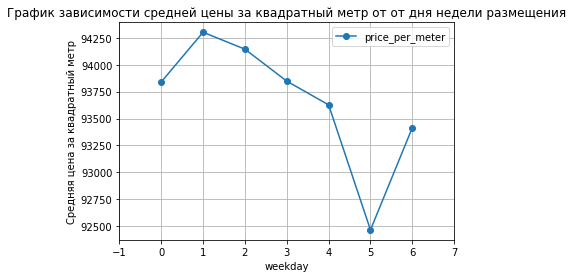

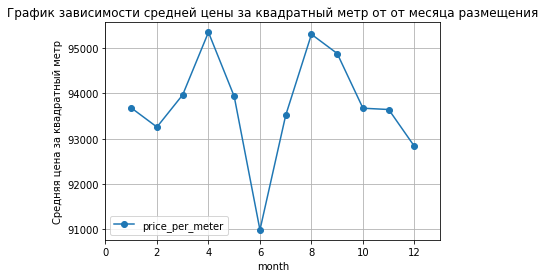

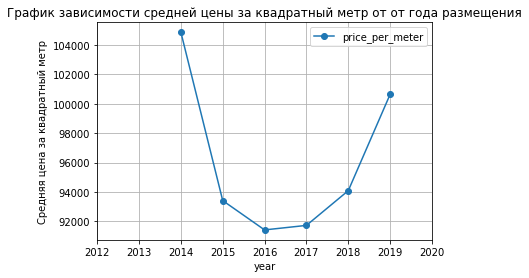

In [80]:
# price_date.plot(style='o-', xlim = (-1,7))
cut_apartments.pivot_table(index = 'weekday', 
                          values= ['price_per_meter']).plot(style='o-', xlim = (-1,7), grid=True)
plt.ylabel('Cредняя цена за квадратный метр')
plt.title('График зависимости средней цены за квадратный метр от от дня недели размещения');
cut_apartments.pivot_table(index = 'month', 
                          values= ['price_per_meter']).plot(style='o-', xlim = (0,13), grid=True)
plt.ylabel('Cредняя цена за квадратный метр')
plt.title('График зависимости средней цены за квадратный метр от от месяца размещения');
cut_apartments.pivot_table(index = 'year', 
                          values= ['price_per_meter']).plot(style='o-', xlim = (2012,2020), grid=True)
plt.ylabel('Cредняя цена за квадратный метр')
plt.title('График зависимости средней цены за квадратный метр от от года размещения');

Самые высокие цены на квартиры, выставленные на продажу в понедельник, они уменьшаются вплоть до пятницы, потом снова растут до понедельника. 
В апреле и августе средняя цена на квартиры самая высокая, а в июне самая низкая.
Самые высокие цены на квартире были в 2014 году, затем следует резкий скачок цены вниз. В 2015 году цены были минимальные, затем начали планомерно расти.

#### Cредняя цена квадратного метра в 10 населённых пунктов с наибольшим числом объявлений населённых пунктах
Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья. 

In [55]:
# 10 населённых пунктов с наибольшим числом объявлений
top_locality = (
    cut_apartments
    .pivot_table(index = 'locality_name', values= ['price_per_meter'], aggfunc = ['count', 'mean'])
)
top_locality.columns = ['count', 'mean_price_per_meter']
# top_locality
top_locality = top_locality.sort_values(by ='count', ascending=False).head(10)
top_locality.sort_values(by ='mean_price_per_meter', ascending=False)


,count,mean_price_per_meter
locality_name,,
Санкт-Петербург,14378,106590.273222
Пушкин,352,101797.225402
посёлок Парголово,325,90362.345200
посёлок Мурино,518,85645.903323
Петергоф,197,83651.729192
посёлок Шушары,439,78551.344545
Колпино,336,75352.475583
Гатчина,303,69308.057870
Всеволожск,394,67268.369444


Самая высокая стоимость жилья ожидаемо в Санкт-Петербурге - 109 тыс руб за квадратный метр, на втором месте Пушкин, он же Царское Село. Замыкает десятку населенных пунктов с самыми высокими ценами на жилье Выборг, цена там почти в два раза ниже, чем в Петербурге - 59 тыс руб

### Квартиры в Санкт-Петербурге
Выделим квартиры в Санкт-Петербурге ('locality_name'). Наша задача — выяснить, какая область входит в центральную область города. Создадим столбец с расстоянием до центра в километрах и округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. 

In [56]:
# выделим квартиры в Санкт-Петербурге
peter_apartments = cut_apartments[cut_apartments['locality_name'] == 'Санкт-Петербург']
peter_apartments= peter_apartments.query('locality_name == "Санкт-Петербург"')

# столбец с расстоянием до центра в километрах
peter_apartments['cityCenters'] = peter_apartments['cityCenters_nearest']/1000

# округлим до целых значений
peter_apartments['cityCenters'] = peter_apartments['cityCenters'].astype('int')

peter_apartments[['cityCenters','cityCenters_nearest']].head()
# peter_apartments

,cityCenters,cityCenters_nearest
0,16,16028.0
2,13,13933.0
4,8,8098.0
7,11,11634.0
9,15,15008.0


Построим график зависимости цены от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

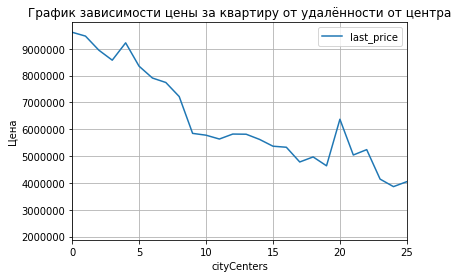

In [82]:
# график зависимости цены за квартиру от удалённости от центра
price_per_km = peter_apartments.pivot_table(index='cityCenters', values = 'last_price')
price_per_km.plot(grid='True', xlim=(0,25))
plt.ylabel('Цена')
plt.title('График зависимости цены за квартиру от удалённости от центра');

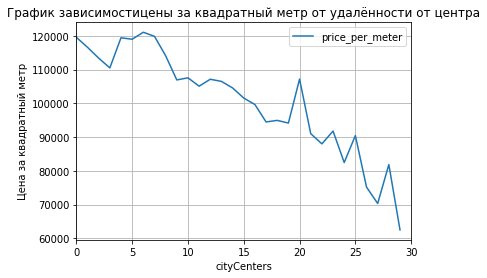

In [81]:
# график зависимости цены за квадратный метр от удалённости от центра
price_per_km = peter_apartments.pivot_table(index='cityCenters', values = 'price_per_meter')
price_per_km.plot(grid='True', xlim=(0,30))
plt.ylabel('Цена за квадратный метр')
plt.title('График зависимостицены за квадратный метр от удалённости от центра');

График показывает, как цена зависит от удалённости от центра. При удалении от центра на 8 км график падает и далее слабо меняется от расстояния, это и будет центральная зона.

Выделим сегмент квартир в центре. Проанализируем территорию не далее 8км от центра.
Изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

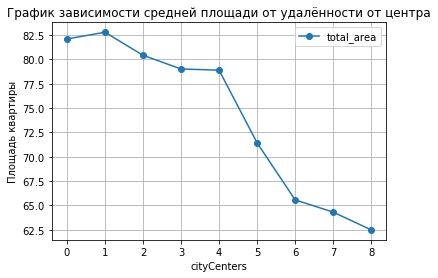

In [83]:
сentre_apart=peter_apartments.query('cityCenters <= 8')
сentre_apart
# график зависимости средней площади от удалённости от центра
сentre_apart.pivot_table(index = 'cityCenters', 
                          values= ['total_area']).plot(style='o-', grid=True)
plt.ylabel('Площадь квартиры')
plt.title('График зависимости средней площади от удалённости от центра');

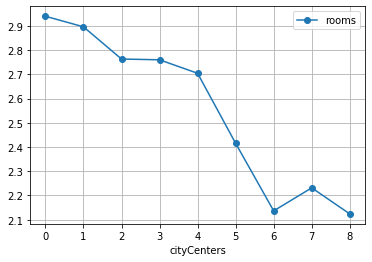

In [60]:
# график зависимости среднего количества комнат от удалённости от центра
сentre_apart.pivot_table(index = 'cityCenters', 
                          values= ['rooms']).plot(style='o-', grid=True, alpha=1)
# сentre_apart.sort_values('cityCenters').plot(style='x', grid=True, alpha=10, x='cityCenters', y='rooms')


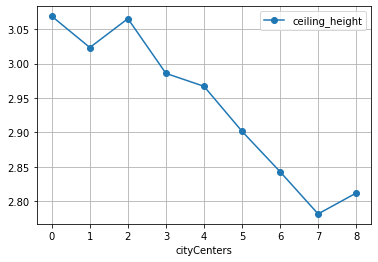

In [61]:
# график зависимости высоты потолков от удалённости от центра
сentre_apart.pivot_table(index = 'cityCenters', 
                          values= ['ceiling_height']).plot(style='o-', grid=True, alpha=1)

Средняя площадь квартир в районе 4 км от центра очень большая от 78 до 83 кв.м, при этом среднее количество комнат 2,7 - 3, то есть преобладают 2х,3х,4х комнатные квартиры. После 4 км от центра средняя площадь и количество комнат резко падают.
Средняя высота потолков максимальна в центре анкт-Петербурга и на удалении 2 км от центра - 3,3м, далее средняя высота потолков неукоснительно падает и к 7км от центра становится равной средней по России 2.6 м. В центре города квартиры старой постройки с высокими потолками и просторными комнатами, чем дальше от центра, тем квартиры становятся меньше. Среднее количесво комнат в центре -3, площадь - 82кв.м 
при удалении на 6 км среднее количество комнат падает до 2, средняя площадь до 65 кв.м

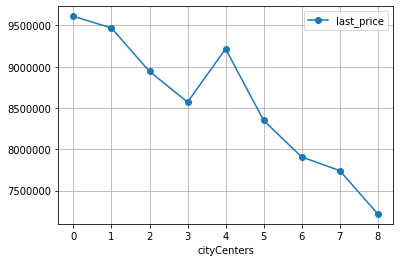

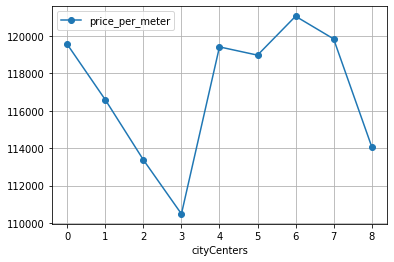

In [62]:
# график зависимости цены от удалённости от центра
сentre_apart.pivot_table(index = 'cityCenters', 
                          values= ['last_price']).plot(style='o-', grid=True, alpha=1)
# график зависимости цены за квадратный метр от удалённости от центра
сentre_apart.pivot_table(index = 'cityCenters', 
                          values= ['price_per_meter']).plot(style='o-', grid=True, alpha=1)

Полная цена за квартиры максимальна в центре и уменьшается до расстояния в 3 км от центра города. В 4 км от города цена делает скачок вверх, а потом также плавно снижается по мере удаления от центра. А цена за квадратный метр максимальна в 6 км от центра города. Возможно, там находятся новые дома в хорошем районе.

#### Факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

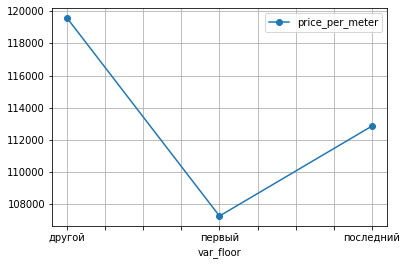

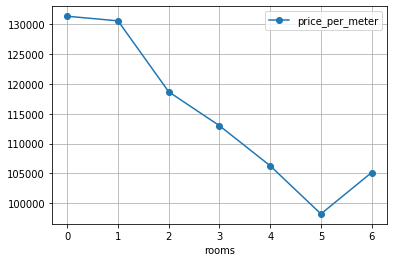

In [63]:
# график зависимости цены за квадратный метр от этажа
сentre_apart.pivot_table(index = 'var_floor', 
                          values= ['price_per_meter']).plot(style='o-', grid=True)
# график зависимости цены за квадратный метр от числа комнат
сentre_apart.pivot_table(index = 'rooms', 
                          values= ['price_per_meter']).plot(style='o-', grid=True)


Как и для других районов, первый этаж стоит дешевле остальных в среднем 108 тыс/кв.м вместо 120 тыс/кв.м, последний чуть дороже, чем первый - 113 тыс/кв.м. А при увеличении числа комнат дают скидку в цене за квадратный метр, за исключением 6-комнатных квартир, но это либо выбросы, либо какие-то уникальные квартиры.

График зависимости цены за квадратный метр от даты публикации объявления

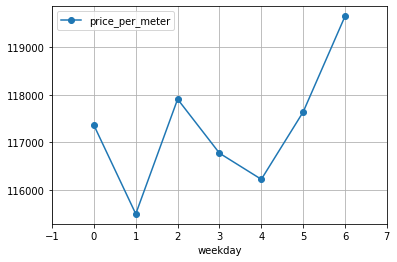

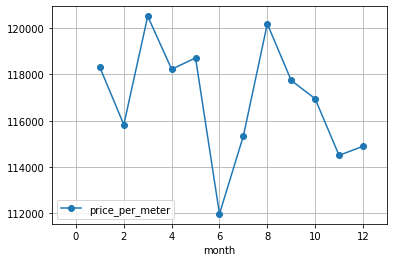

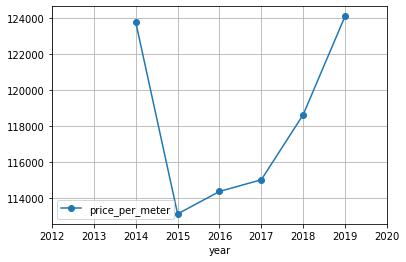

In [64]:
сentre_apart.pivot_table(index = 'weekday', 
                          values= ['price_per_meter']).plot(style='o-', xlim = (-1,7), grid=True)
сentre_apart.pivot_table(index = 'month', 
                          values= ['price_per_meter']).plot(style='o-', xlim = (-1,13), grid=True)
сentre_apart.pivot_table(index = 'year', 
                          values= ['price_per_meter']).plot(style='o-', xlim = (2012,2020), grid=True)

Как и в целом по городу, самые дешевые цены выставляются в июне и в 2015году. Дни низких цен в центре другие - понедельник и четверг, а вот самые дорогие объявления публикуются по субботам, как и для остальных населенных пунктов. График зависимости цены за квадратный метр от года похож на аналогичный для всех населенных пунктов, тут цены зависят от общей экономической ситуации в России. 

### Шаг 5. Общий вывод

В работе проведен исследовательский анализ данных и сделано следующее:

Построены гистограммы для для каждого параметра:
 площадь, цена, число комнат, высота потолков.
Изучив гистограммы, сделаны следующие выводы:
Больше всего предложений по квартирам, площадью 40-50 кв.м.
Средняя цена квартир составляет 5 млн.руб, средняя цена 
за квадратный метр - 100 тыс.руб/кв.м
Чаще всего встречаются объявления о продаже 1-,2-х комнатных квартир,
 в 75% случаев у квартир не более 3 комнат;
В большинстве объявлений высота потолков - 2,7м ;
чаще квартиры продаются от 0 до 50дней;

Убраны  выбивающиеся значения, в результате в выборке 
оставлены объявления о квартирах, где:
 - площадь меньше 150 кв.м
 - цена квадратного метра от  20 000 до 175 000 руб/кв.м
 - количество комнат до 6
 - высота потолков от 2,5 до 4 м


Зависит ли цена от квадратного метра, числа комнат,
 удалённости от центра

Общая цена квартиры прямо пропорциональна общей площади квартиры. В случае с маленькими квартирами до 60 кв.м. эта зависимость 
явная, при большей площади квартиры разброс цен больше 
Чем ближе к центру, тем больше разброс в ценах, максимальные значения цен также ближе к центру города. По мере удаления от
 центра объявления смещаются в область меньших цен

Средняя цена за квадратный метр ниже всего в случае первого
этажа. Последний этаж чуть дороже первого, но тоже ощутимо 
ниже, чем любой не первый и не последний
Цена за квадратный метр выше для 0 комнат, 
это в нашей таблице обозначает апартаменты или квартиры со 
свободной планировкой, это обычно новые дома, поэтому и цена
 на квадратный метр выше. Еще высока цена однокомнатных
 квартир. Разница в цене за
 квадратный метр между 2х - 5и комнатными квартирами меньше.
Самые высокие цены на квартиры, выставленные на продажу в понедельник, 
они уменьшаются вплоть до пятницы, потом снова растут до понедельника. 
В апреле и августе средняя цена на квартиры самая высокая, 
а в июне самая низкая.
Самые высокие цены на квартире были в 2014 году, 
затем следует резкий скачок цены вниз. В 2015 году цены были
 минимальные, затем начали планомерно расти. 


Выбраны 10 населённых пунктов с наибольшим числом объявлений 
и изучены средняя цена квадратного метра.
Самая высокая стоимость жилья ожидаемо в Санкт-Петербурге - 109 тыс руб за квадратный метр,
 на втором месте Пушкин, он же Царское Село.
 Замыкает десятку населенных пунктов с самыми высокими ценами на жилье Выборг,
 цена там почти в два раза ниже, чем в Петербурге - 59 тыс руб


Изучены объявления о продаже квартир в Санкт-Петербурге.
Наша задача была выяснить, какая область входит в центральную область города

При удалении от центра на 8 км график зависимости 
средней цены от расстояния 
от центра падает и далее слабо меняется от расстояния,
 это и будет центральная зона.
Изучив сегмент квартир в центре, выделили следующее:
 В центре города квартиры старой постройки с высокими потолками 3,3 м и просторными комнатами,
 среднее количесво комнат в центре -3, площадь - 82кв.м 
при удалении на 6 км среднее количество комнат падает до 2, средняя площадь до 65 кв.м

Как и для других районов, в Санкт-Петербурге первый этаж стоит дешевле остальных в среднем 108 тыс/кв.м вместо 120 тыс/кв.м, последний чуть дороже, чем первый - 113 тыс/кв.м.
 А при увеличении числа комнат дают скидку в цене за квадратный метр
Как и в целом по городу, самые дешевые цены выставляются в июне и в 2015году. Дни низких цен в центре другие - понедельник и четверг, а вот самые дорогие объявления публикуются по субботам, как и для остальных населенных пунктов. График зависимости цены за квадратный метр от года похож на аналогичный для всех населенных пунктов, 
тут цены зависят от общей экономической ситуации в России. 

